## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [15]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [16]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
# df['Total'] = df['math score']+df['reading score']+df['writing score']
# df.head(2)

#### Preparing X and Y variables

In [19]:
X = df.drop(columns = ['math score'], axis=1)

X.shape

(1000, 7)

In [20]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [21]:
y = df['math score']

In [22]:
num_features = list(X.select_dtypes(include=['int64']).columns)
cat_features = list(X.select_dtypes(include = ['object']).columns)

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    """
    create a transformer to  simply transforms the data by selecting the desired attributes (numerical or categorical), dropping the rest, and 
    converting the resulting DataFrame to a NumPy array. 
    Args: 
    attributes,
    
    Return: values
    """
    def __init__(self, attributes):
        self.attributes = attributes
        
    def fit(self, X, y):
        return 
    
    def transform(self, X, y):
        return X[self.attributes].values

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# num_pipeline = Pipeline([
#                    ('selector', DataFrameSelector(num_features))
#                    ("impute", SimpleImputer(strategy='mean')),
#                    ('Scalar', StandardScaler())
#                    ])

# cat_pipeline = Pipeline([
#      ('selector', DataFrameSelector(cat_features))
#     ('OnehotEncoder', OneHotEncoder())
# ])

num_pipeline = Pipeline([
                   ("impute", SimpleImputer(strategy='mean')),
                   ('Scalar', StandardScaler())
                   ])

cat_pipeline = Pipeline([
    ('OnehotEncoder', OneHotEncoder())
])

preprocessor= ColumnTransformer( transformers= [
                                ('num_pipeline', num_pipeline, num_features),
                                ('cat_features', cat_pipeline, cat_features)
                 ])

In [43]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('Scalar', StandardScaler())]),
                                 ['reading score', 'writing score']),
                                ('cat_features',
                                 Pipeline(steps=[('OnehotEncoder',
                                                  OneHotEncoder())]),
                                 ['gender', 'race/ethnicity',
                                  'parental level of education', 'lunch',
                                  'test preparation course'])])

In [25]:
X_prepared = preprocessor.fit_transform(X)

In [26]:
X_prepared.shape

(1000, 19)

In [27]:
X_prepared

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test =train_test_split(X_prepared, y, random_state=42)

In [29]:
X_train

array([[-1.51916447, -0.9253323 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.8792638 ,  0.65485663,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [-0.28568707, -0.46444386,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.49126664, -0.99117351,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-1.45063795, -0.99117351,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.4960025 ,  1.37910989,  1.        , ...,  1.        ,
         0.        ,  1.        ]])

#### Create an Evaluate Function to give all metrics after model Training

In [30]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mse, mae, rmse, r2_square

In [31]:
models = {
    "Linear Regression": LinearRegression(),
     "Lasso": Lasso(),
    "Ridge": Ridge(),
    #"K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}



In [32]:
model_list = []
r2_list = []
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate performance
    
    model_train_mse, model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mse, model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    model_list.append(list(models.keys())[i])
    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2972
- Mean Absolute Error: 4.2383
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4825
- Mean Absolute Error: 4.3379
- R2 Score: 0.8778


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5515
- Mean Absolute Error: 5.1837
- R2 Score: 0.8077
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6541
- Mean Absolute Error: 5.2217
- R2 Score: 0.8200


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2976
- Mean Absolute Error: 4.2368
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4788
- Mean Absolute Error: 4.3354
- R2 Score: 0.8780


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2887
- Mean Absolute Error: 0.0200
- R2 Score: 0.9996
-------------------------------

C:\Users\91987\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.9048
- Mean Absolute Error: 0.5957
- R2 Score: 0.9963
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4395
- Mean Absolute Error: 5.0216
- R2 Score: 0.8314


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 2.9444
- Mean Absolute Error: 2.3221
- R2 Score: 0.9612
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9762
- Mean Absolute Error: 4.6508
- R2 Score: 0.8548


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8359
- Mean Absolute Error: 4.7823
- R2 Score: 0.8474
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.1856
- Mean Absolute Error: 4.8090
- R2 Score: 0.8445




### Results

In [33]:
model_list

['Linear Regression',
 'Lasso',
 'Ridge',
 'Decision Tree',
 'Random Forest Regressor',
 'XGBRegressor',
 'CatBoosting Regressor',
 'AdaBoost Regressor']

In [34]:
r2_list

[0.8778243107659015,
 0.8200278028352899,
 0.8779901445296864,
 0.7612262519623313,
 0.8445170609817104,
 0.8314487511631932,
 0.8548295164541377,
 0.8444773667570972]

In [35]:
results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['model_list', 'r2_score']).sort_values(by=['r2_score'], ascending=False)

In [36]:
results

,model_list,r2_score
2,Ridge,0.877990
0,Linear Regression,0.877824
6,CatBoosting Regressor,0.854830
4,Random Forest Regressor,0.844517
7,AdaBoost Regressor,0.844477
5,XGBRegressor,0.831449
1,Lasso,0.820028
3,Decision Tree,0.761226


## Linear Regression

In [37]:
lin_model = LinearRegression()

model_fit = lin_model.fit(X_train, y_train)
y_pred = model_fit.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2 score is", r2)

r2 score is 0.8778243107659015


## Plot y_pred and y_test

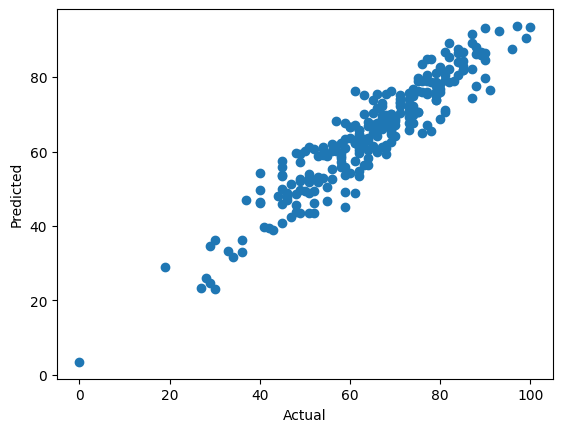

In [38]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math score'>

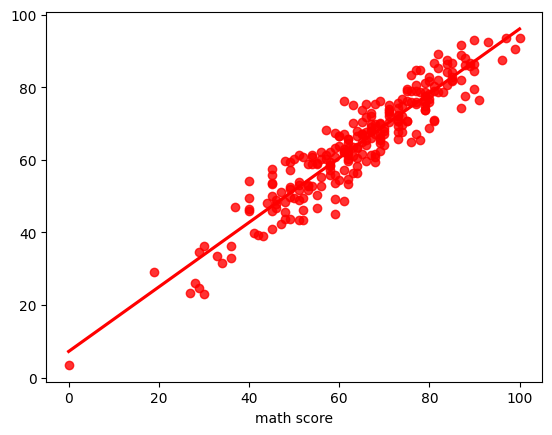

In [39]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')